## 1. Project Title: Long-term Investor Prediction with Machine Learning

While banks are interested in maintaining their customers, they are also interested in getting new customers. In addition, the banks can only really improve their profit margins by encouraging their customers to make long-term deposits and investments with them. One strategy to do this would be to advertise to the customers via telemarketing calls.

This project will aim to employ machine learning for the task of predicting the efficacy of telemarketing campaigns run by banking institutions.


## 2. Methodology

This project will be carried out using the __CRISP-DM__ methodology. This is one of the more popular data science methodologies and is characterized by six important phases, which are as follows:

1. _Business Understanding_,
2. _Data Understanding_,
3. _Data Preparation_,
4. _Data Modelling_,
5. _Model Evaluation_, and
6. _Model Deployment_.

It should be noted that these phases are usually recurrent in nature (i.e., some phases may be repeated). As such, they do not necessarily follow a linear progression


## 3. Tools

The tools of use for this project include:

1. _Pandas_
2. _NumPy_
3. _Matplotlib_ & _Seaborn_
4. _Sci-kit Learn_

#### 3.1. Pandas & NumPy

__Pandas__ is a Python library built upon the __NumPy__ library. The idea behind _Pandas_ is to be able to operate on text data, where _NumPy_ is best suited for numerical operations, irrespective of the fact that it can represent text to some degree.

#### 3.2. Matplotlib & Seaborn

__Matplotlib__ and __Seaborn__ are Python libraries for data visualization. Other alternatives include __Bokeh__ and __Plotly__.

#### 3.3. Sci-kit Learn

__Sci-kit Learn__ is a Python library for machine learning and data modeling. It provides a lot of utilities and algorithmic implementations for a variety of machine learning tasks such as __classification__, __regression__, __outlier detection__, and __clustering__.


<div align="center"><h1>Project Implementation via CRISP-DM</h1></div>

<div><h3>01. Business Understanding</h3></div>

__EliteBank Investment Services__ is a leading financial institution specializing in investment banking, asset management, and wealth advisory services. To improve their profitability, they intend to run a new telemarketing campaign to bring in fresh investments. To this end, they would like to leverage the data obtained from previous campaigns to forecast how likely they are to convince customers to invest.

This would be an immense boon to them in the following ways:

1. _Provide a likelihood estimation as to the chances of a customer buying long-term deposits_.
2. _Provide good plan as to the customers to focus more attention on_.
3. _Provide some information as to the efficacy of telemarketing campaigns_.

<div><h3>02. Data Understanding</h3></div>

With the _**Business Understanding**_ out of the way, the next step is to understand the data to be obtained and used for the task. This will involve the process of __*Exploratory Data Analysis (EDA)*__.

EDA is the process of sifting through data with the goal of extracting insights. These insights allow a better understanding of the available data and what can be done with it. They can also be used for guided preparation of the dataset in the appropriate manner. Just like regular analysis, EDA begins with a set of __questions__ and/or __hypotheses__. The EDA process will then prove or disprove these hypotheses, and hopefully, reveal other points of inquiry along the way.

The required libraries and packages are imported first. The EDA process is carried out here as shown below. The high-level steps to follow are:

1. Import the required libraries
2. Load in the dataset
3. Analyze and observe its properties.
   * Missing data
   * Inconsistent values
   * Low categorical cardinality
   * Feature correlations
4. Report on these properties and how they might affect our final solution.

<div align="center"><h3>2.1. Enter EDA Code Here</h3></div>

In [1]:
# Import required utilities
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

from scipy.io import arff
import gc

In [5]:
# Seed for reproducibility
SEED = np.random.seed(seed = 2023)

In [18]:
# Import the dataset
data_path = "/content/Bank_Marketing_Dataset.arff"

In [19]:
def truncate_data(data):
    if data.isdigit():
        return int(data)
    else:
        if "." in data:
            try:
                return float(data)
            except:
                return data

    return data

def truncate_row(row):
    return [truncate_data(d) for d in row]

In [20]:
def read_data(path, num_lines=500000*4):
    with open(path, "r") as f:
        lines = f.readlines()

    ix = 0
    for (i, line) in enumerate(lines):
        if line.__contains__("@DATA"):
            ix = i
            break
    lines = lines[:num_lines+ix+1]

    header = [l.split(" ")[1] for l in lines[:ix] if l.startswith("@ATTRIBUTE")]

    data = [truncate_row(l.replace("\n", "").strip().split(",")) for l in lines[ix+1:]]
    data = [l for l in data if len(l) == len(header)]

    return pd.DataFrame(data = data, columns = header)

In [22]:
data = read_data(data_path)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  object
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(5), object(12)
memory usage: 1.4+ MB


In [25]:
#convert features to correct datatypes
data['age'] = data['age'].astype('int')
data['balance'] = data['balance'].astype('int')
data['day'] = data['day'].astype('int')
data['duration'] = data['duration'].astype('int')
data['campaign'] = data['campaign'].astype('int')
data['pdays'] = data['pdays'].astype('int')
data['previous'] = data['previous'].astype('int')


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [27]:
# Feature cardinality
data.nunique()

,0
age,76
job,12
marital,3
education,4
default,2
balance,3805
housing,2
loan,2
contact,3
day,31


In [28]:
data.shape

(11162, 17)

#### Data summary

In [29]:
# Describe data
data.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


##### Missing Values

In [30]:
# Check for missing values
100 * data.isnull().sum() / len(data)

,0
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
balance,0.0
housing,0.0
loan,0.0
contact,0.0
day,0.0


Based on the results of the short data analysis above, it would seem that there are no missing values.

#### Customer ages and jobs

It makes some sense to observe the range of __ages__ and __jobs__ represented in the dataset. This can be done by observing the distribution of the __age__ and __job__ variables.

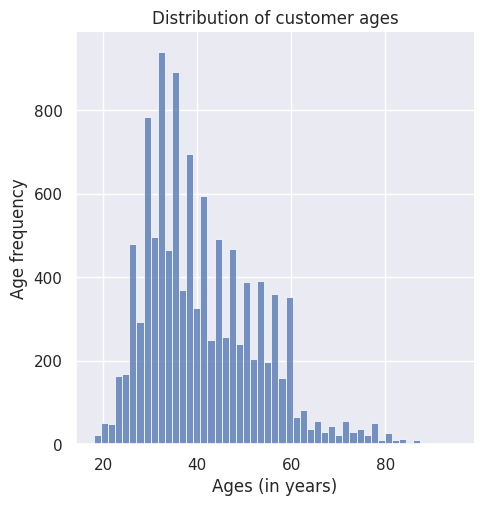

In [31]:
# Distribution of customer ages
sns.displot(data["age"])

plt.title("Distribution of customer ages")

plt.xlabel("Ages (in years)")
plt.ylabel("Age frequency")

plt.show(); plt.close("all")

Observing the distribution of customer ages gives the impression that most customers are within their younger years. As such, it is a reasonable expectation that most of the customers to be employed in some gainful manner, as opposed to older, senior citizens, who are more likely to be retired.

We can confirm this hypothesis by visualizing the distribution of the __job__ feature.

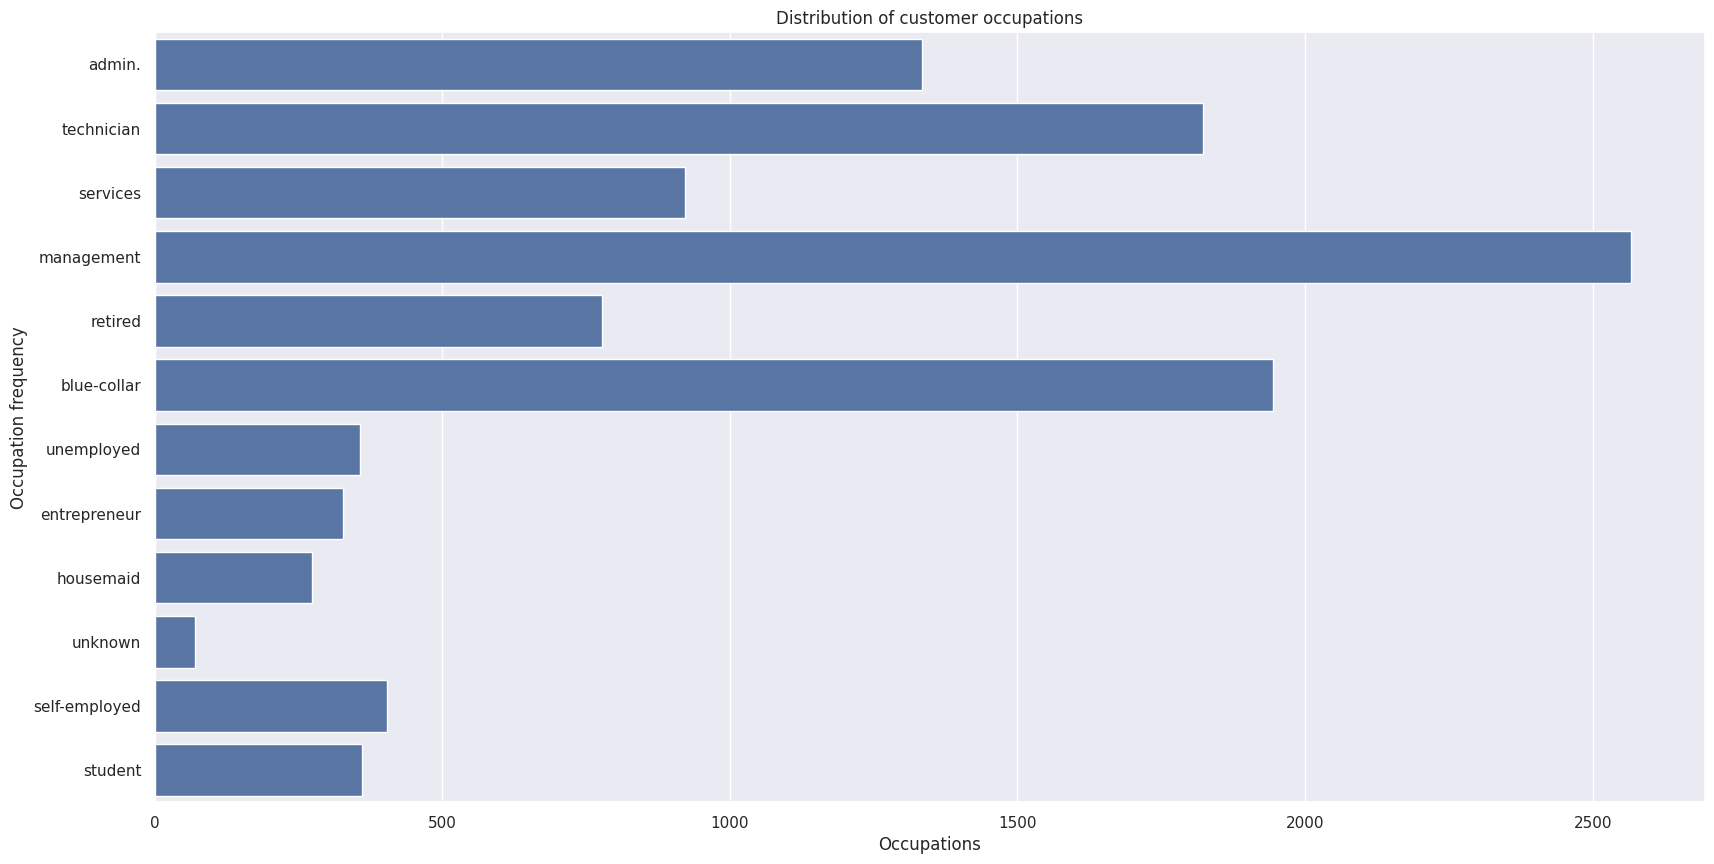

In [32]:
# Occupation distribution
plt.figure(figsize = (20, 10))
sns.countplot(data["job"])

plt.title("Distribution of customer occupations")

plt.xlabel("Occupations")
plt.ylabel("Occupation frequency")

plt.show(); plt.close("all")

#### Bivariate observation of the occupations and Age
We can then look at a breakdown of the occupations by age. We will segment the ages into the __working__ and __retired__ classes with a threshold of __60__ years, as 60 is an acceptable retirement age.

In [33]:
# Set age hue
hue = data["age"].apply(lambda x: "Working age" if x < 60 else "Retirement age")

age_job = data[["job"]].copy()
age_job["hue"] = hue.values

In [34]:
age_job.head()

,job,hue
0,admin.,Working age
1,admin.,Working age
2,technician,Working age
3,services,Working age
4,admin.,Working age


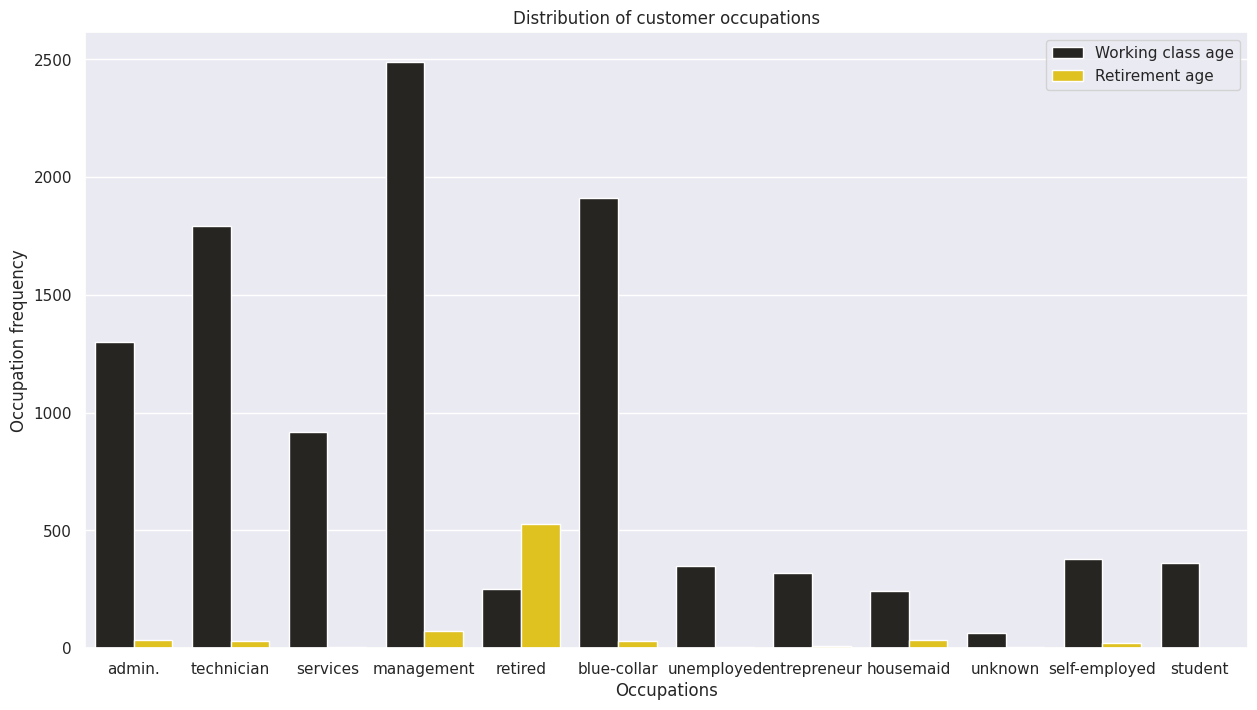

In [35]:
# Occupation distribution based on age
plt.figure(figsize = (15, 8))
sns.countplot(data = age_job, x = "job", hue = "hue", palette = "dark:gold")

plt.title("Distribution of customer occupations")

plt.xlabel("Occupations")
plt.ylabel("Occupation frequency")

plt.legend(["Working class age", "Retirement age"])

plt.show(); plt.close("all")

As can be seen from the visualization, most of the occupations are dominated by the young working class, while the retirement sector is dominated by older citizens, lending some credence to the earlier hypothesis.

Also, it is observed that the __unemployed__ segment is completely comprised of young, able-bodied people who should be put to work. As these people have no discernable source of income, __EliteBank__ might be well-advised to pay as little attention as possible to people in this segment when implementing their telemarketing strategies.

In addition, some of the customers were observed to have no records with the bank as regards their source of income (i.e., the __unknown__ segment). It would be a prudent move to rectify this oversight in order to target this set of people more effectively.

#### Customer deposit decision with respect to their loan statuses

The accumulation of debts and/or liabilities may be expected to have some impact on the ability of a customer to invest their money in a venture. Within this dataset, there are three debt types recorded:

1. Debts from personal loans (__loan__),
2. Debts from credit (__default__), and
3. Debts from housing loans (__housing__).

We can observe how these types of debt interrelate, as well as how they relate with the __deposit__ decision of the customers.

<h2 align="center">Interrelation between debt types</h2>

#### Personal loans and credit default status

__Hypothesis__: It would make sense that personal loan and credit are correlated i.e., people who default on credit will also probably default on their personal loans.

To verify our hypothesis, we will compare the __loan__ and __default__ features using a __grouped bar chart__.

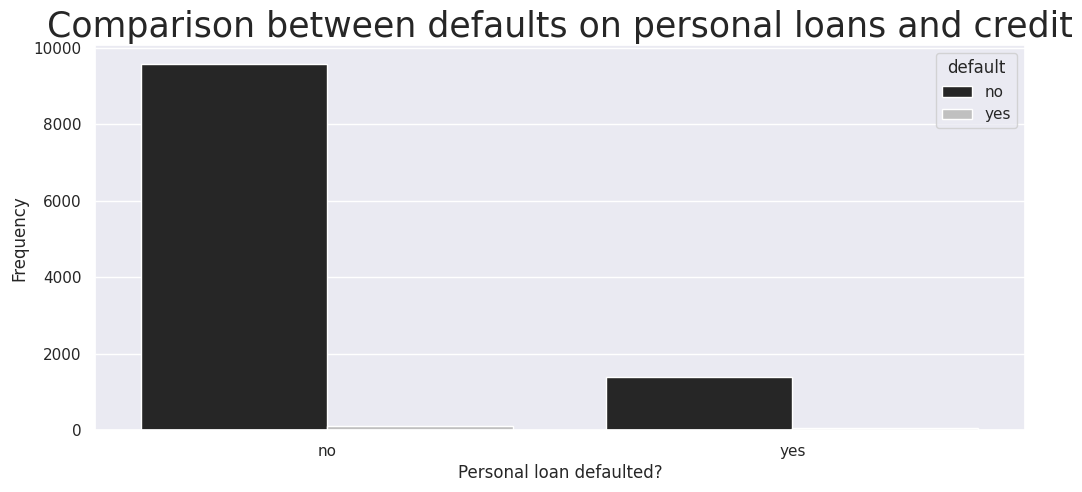

In [36]:
# Deposit choice vs. credit defaults
plt.figure(figsize = (12, 5))
sns.countplot(data = data, x = "loan", hue = "default", palette = "dark:silver")

plt.title("Comparison between defaults on personal loans and credit", fontsize = 25)

plt.xlabel("Personal loan defaulted?")
plt.ylabel("Frequency")

# plt.legend(["Working class age", "Retirement age"])

plt.show(); plt.close("all")

__Observation__:

From the chart above, it is obvious that:

+ A large majority of the customers have not defaulted on any of the loans, whether personal or credit.
+ Also, although quite a few people have defaulted on personal loans, almost no one has defaulted on credit loans

This might imply one of two things:

+ Most people do not max out their credit line, and/or,
+ Most people do not use credit at all.

#### Personal loans and housing loan default status

__Hypothesis__: It would make sense that personal loan and credit are correlated i.e., people who default on credit will also probably default on their personal loans.

To verify our hypothesis, we will compare the __loan__ and __default__ features using a __grouped bar chart__.

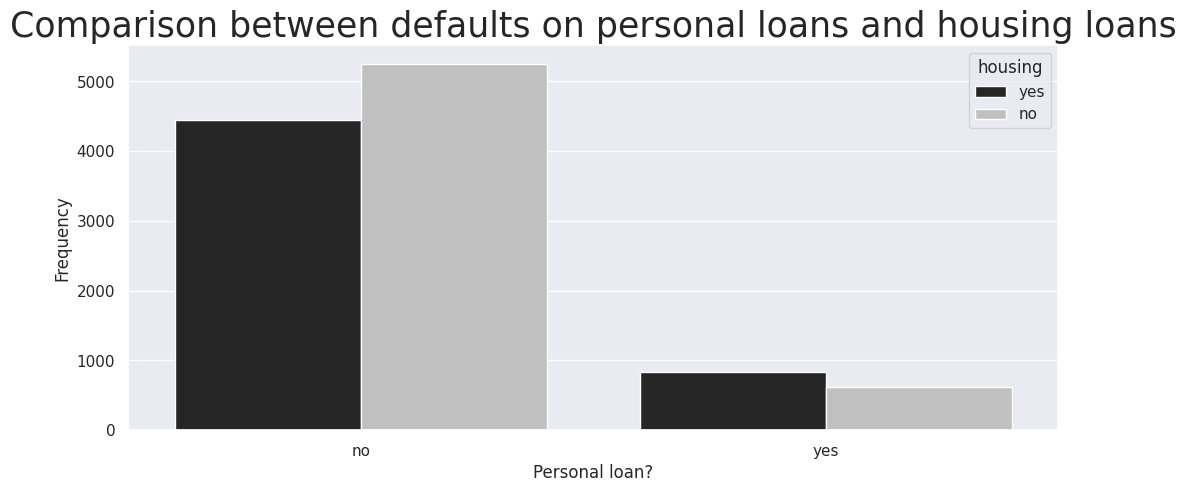

In [37]:
# Personal loans vs. housing loan defaults
plt.figure(figsize = (12, 5))
sns.countplot(data = data, x = "loan", hue = "housing", palette = "dark:silver")

plt.title("Comparison between defaults on personal loans and housing loans", fontsize = 25)

plt.xlabel("Personal loan?")
plt.ylabel("Frequency")

# plt.legend(["Working class age", "Retirement age"])

plt.show(); plt.close("all")

In [38]:
data["housing"].value_counts(normalize = True)

,proportion
housing,
no,0.526877
yes,0.473123


__Observation__:

From the chart above, it is obvious that:

+ A large majority of the customers have not defaulted on any personal loans.
+ The likelihood of a customer defaulting on a housing loan is almost random. This may be due to the fact that housing loans usually take longer to pay back, and if you are repaying a loan long enough, there might come a point when a payment default will occur.

This might imply one of two things:

+ Most people do not max out their credit line, and/or,
+ Most people do not use credit at all.

#### Credit and housing loan default status

__Hypothesis__: Housing loans can be quite heavy, and the payback can be taxing. As such, it would make sense that p[eople wih housing loans are more likely to limit their credit loans. If this is so, then there will likely be a lower default rate amongst people with housing loans.

To verify our hypothesis, we will compare the __housing__ and __default__ features using a __grouped bar chart__.

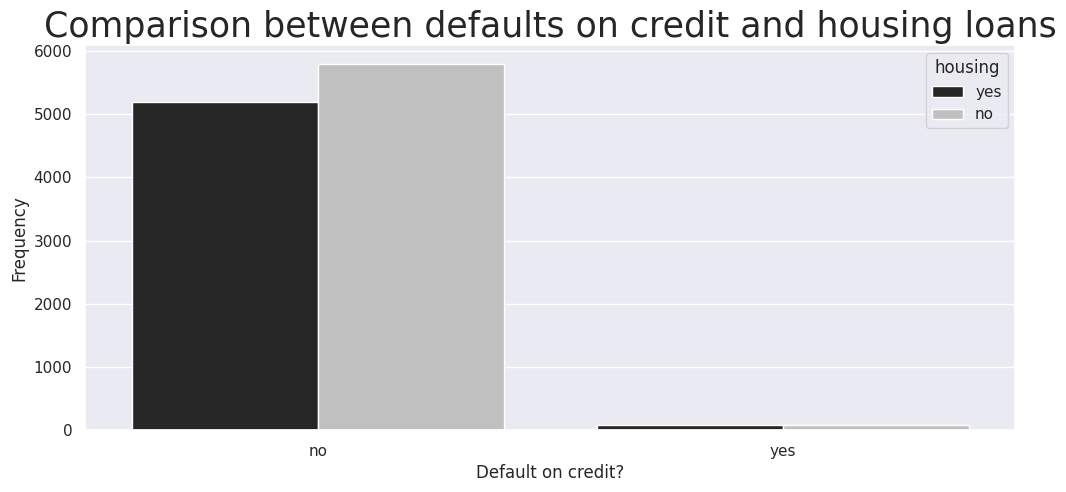

In [39]:
# Personal loans vs. housing loan defaults
plt.figure(figsize = (12, 5))
sns.countplot(data = data, x = "default", hue = "housing", palette = "dark:silver")

plt.title("Comparison between defaults on credit and housing loans", fontsize = 25)

plt.xlabel("Default on credit?")
plt.ylabel("Frequency")

# plt.legend(["Working class age", "Retirement age"])

plt.show(); plt.close("all")

__Observation__:

From the chart above, it is obvious that:

+ A large majority of the customers have not defaulted on credit.
+ The likelihood of a customer defaulting on a housing loan is almost random. This may be due to the fact that housing loans usually take longer to pay back, and if you are repaying a loan long enough, there might come a point when a payment default will occur.

<h2 align="center">Relation between debt types and marital status</h2>

#### Customer marital status with respect to their credit default status

__Hypothesis__: Since we know from prior analysis that most customers do not default on credit, we would expect the marital status to have little to no effect on whether or not the customer defaulted.

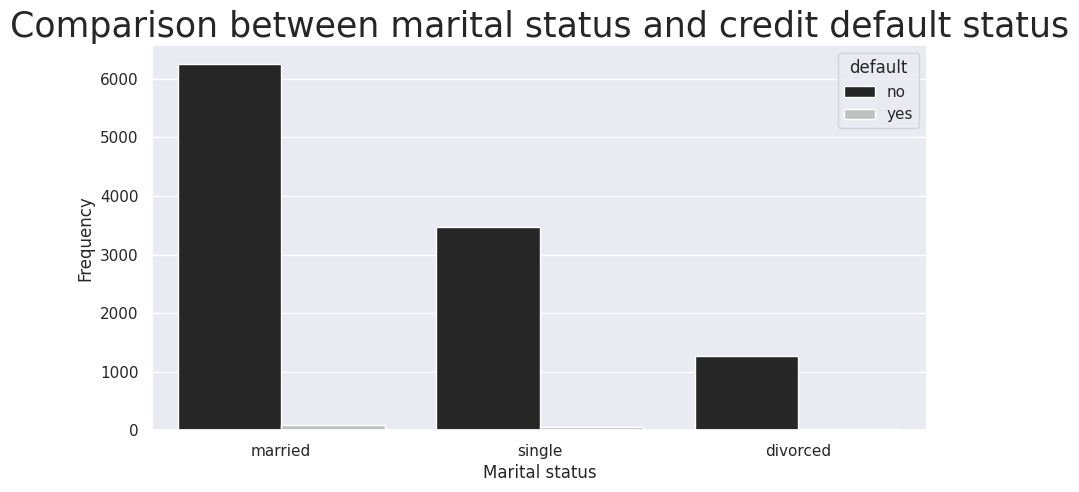

In [40]:
# Marital status compared to credit default
plt.figure(figsize = (10, 5))
sns.countplot(data = data, x = "marital", hue = "default", palette = "dark:silver")

plt.title("Comparison between marital status and credit default status", fontsize = 25)

plt.xlabel("Marital status")
plt.ylabel("Frequency")

# plt.legend(["Working class age", "Retirement age"])

plt.show(); plt.close("all")

__Observation__:

From the chart above, it is obvious that most customers do not default on credit, irrespective of marital status.

#### Customer deposit decision with respect to their housing loan default status

__Hypothesis__: It would make sense to put forward the hypothesis that customers who have defaulted on housing loans previously extended to them may not be in the best financial state to make investment deposits.

We can attempt to observe the veracity of this hypothesis by visualizing the customers' deposit decision based on whether or not they have housing loan defaults. This is done via a __grouped bar chart__.

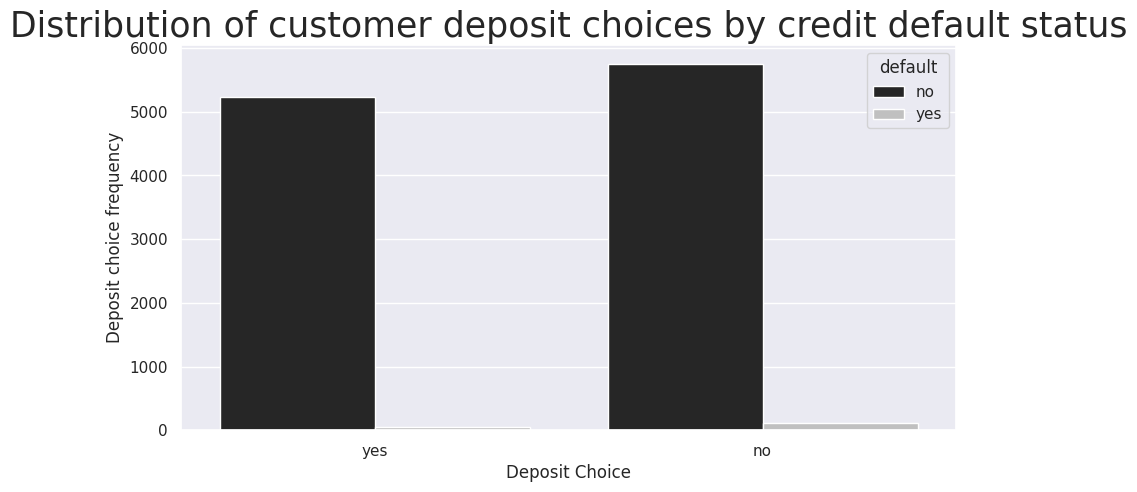

In [41]:
# Deposit choice vs. credit defaults
plt.figure(figsize = (10, 5))
sns.countplot(data = data, x = "deposit", hue = "default", palette = "dark:silver")

plt.title("Distribution of customer deposit choices by credit default status", fontsize = 25)

plt.xlabel("Deposit Choice")
plt.ylabel("Deposit choice frequency")

# plt.legend(["Working class age", "Retirement age"])

plt.show(); plt.close("all")

__Observation__: From the chart above, it is obvious that very few customers have defaulted on their credit. A likely implication of this is that the credit default status of customers will have little to no bearing on whether or not the customer would make a deposit. However, an equally likely, but diametrically opposed) implication is the fact that people who default on credit are likely not to have the funds to make long-term investment deposits anyway.

This is an interesting dichotomy, and might bear more looking into by __EliteBank__.

#### Customer deposit decision with respect to their personal loan default status

__Hypothesis__: It would make sense to put forward the hypothesis that customers who have defaulted on personal loans previously extended to them may not be in the best financial state to make investment deposits.

We can attempt to observe the veracity of this hypothesis by visualizing the customers' deposit decision based on whether or not they have loan defaults. This is done via a __grouped bar chart__.

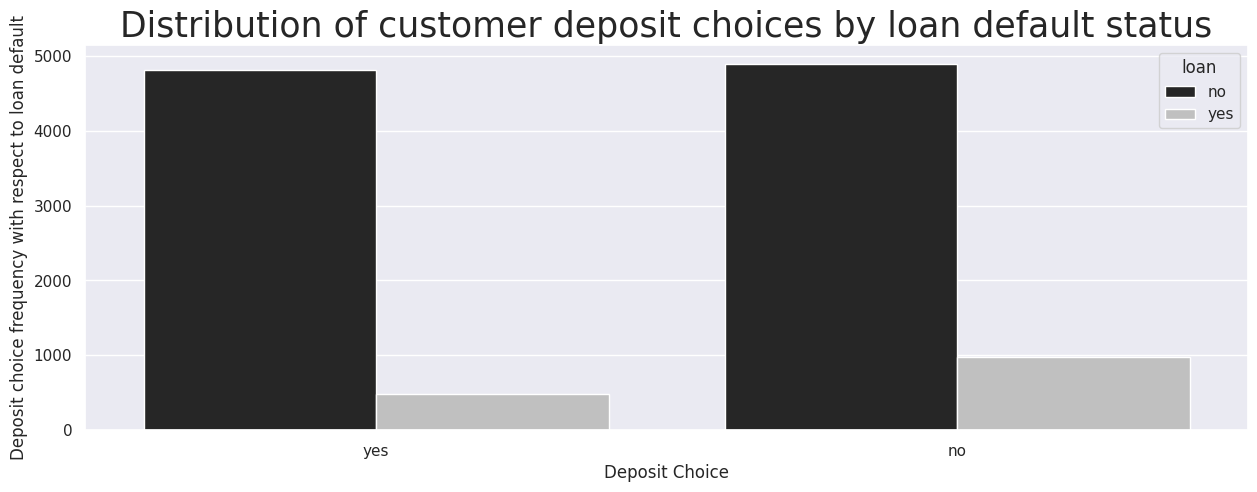

In [42]:
# Deposit choice vs. loan defaults
plt.figure(figsize = (15, 5))
sns.countplot(data = data, x = "deposit", hue = "loan", palette = "dark:silver")

plt.title("Distribution of customer deposit choices by loan default status", fontsize = 25)

plt.xlabel("Deposit Choice")
plt.ylabel("Deposit choice frequency with respect to loan default")

# plt.legend(["Working class age", "Retirement age"])

plt.show(); plt.close("all")

__Observation__: From the chart above, it is obvious that very few customers have defaulted on their credit. A likely implication of this is that the personal loan default status of customers will have some bearing on whether or not the customer would make a deposit. However, an equally likely, but diametrically opposed) implication is the fact that people who default on personal loans are likely not to have the funds to make long-term investment deposits anyway.

This is an interesting dichotomy, and might bear more looking into by __EliteBank__.

#### Customer deposit decision with respect to their housing loan default status

__Hypothesis__: It would make sense to put forward the hypothesis that customers who have defaulted on housing loans previously extended to them may not be in the best financial state to make investment deposits.

We can attempt to observe the veracity of this hypothesis by visualizing the customers' deposit decision based on whether or not they have housing loan defaults. This is done via a __grouped bar chart__.

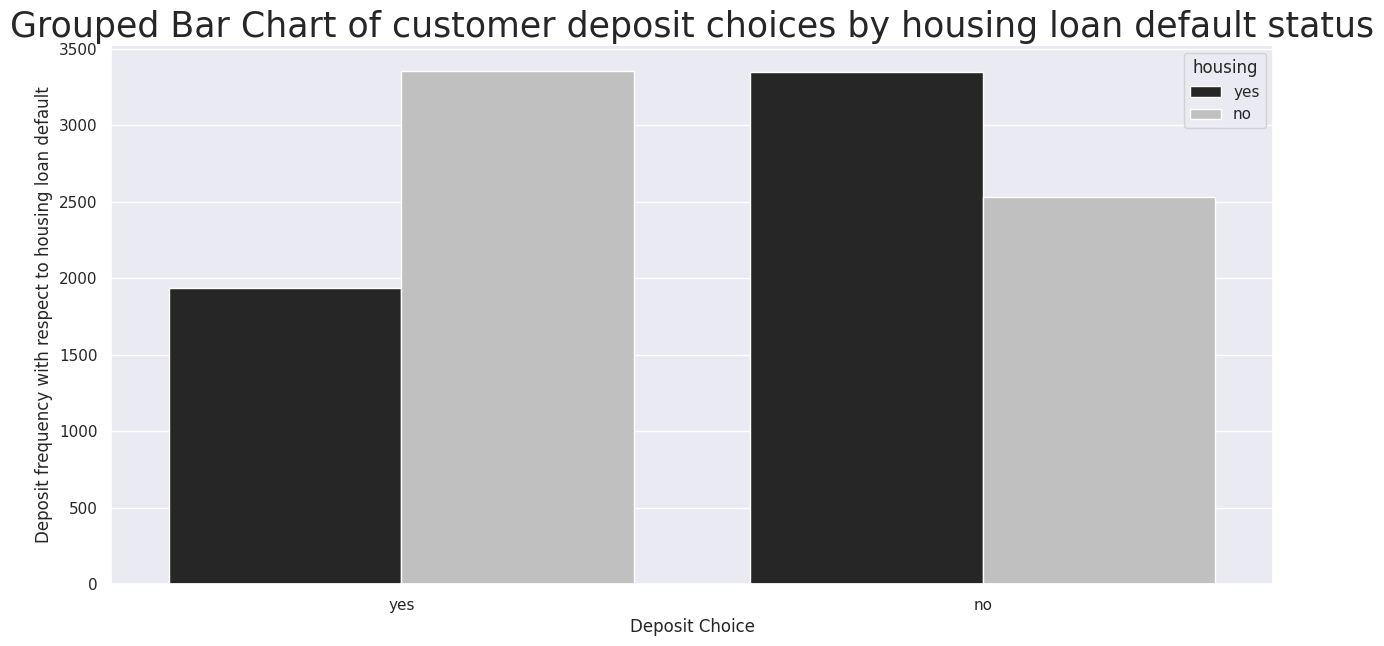

In [43]:
# Deposit choice vs. housing loans defaults
plt.figure(figsize = (15, 7))
sns.countplot(data = data, x = "deposit", hue = "housing", palette = "dark:silver")

plt.title("Grouped Bar Chart of customer deposit choices by housing loan default status", fontsize = 25)

plt.xlabel("Deposit Choice")
plt.ylabel("Deposit frequency with respect to housing loan default")

# plt.legend(["Working class age", "Retirement age"])

plt.show(); plt.close("all")

__Observation__:

From the chart above, it is very obvious that customers who default on housing loans are less likely to make the financial deposit. The segment of people who make the deposit is stringly dominated by people who have not defaulted on housing loans, while the no-deposit segment is inversely dominated by housing loan defaulters.

It may be inferred that this is due to the fact that housing loans are usually quite large. The average housing loan in the U.S., as at __2014__ (the year this dataset was curated) was about __~$ 210,000__ [[Reference](https://www.statista.com/statistics/1320422/mortgage-loan-amount-home-buyers-usa/)], which is a very huge amount of money. Attempting to pay back such expensive mortgage while also shelling out money for investment banking can be a tall order.

All of this may imply that people who are able to more comfortably pay back their loans are more likely to have some extra money for investments. Hence, it might behoove __EliteBank__ to:

+ Subsidize the housing market more effectively for their customers,
+ Buy smart investments that can pay off the mortgage, and/or
+ Provide better systems and strategies for customers to pay back their housing loans

These should help free up more capital on the customers' end for investment.

#### Customer deposit decision with respect to their jobs and educational level

__Hypothesis__: It would make sense to put forward the hypothesis that customers who have higher levels of education would likely have better:
1. Understanding of the investment process, and
2. Better paying jobs, which make them more likely to take advantage of investment services.

We can attempt to observe the veracity of this hypothesis by:

1. Comparing the __job__ with the __education__ level.
2. Comparing the __deposit__ decision with the __education__ level.
3. Comparing the __deposit__ with the __job__ level.

This is done via __grouped bar charts__.

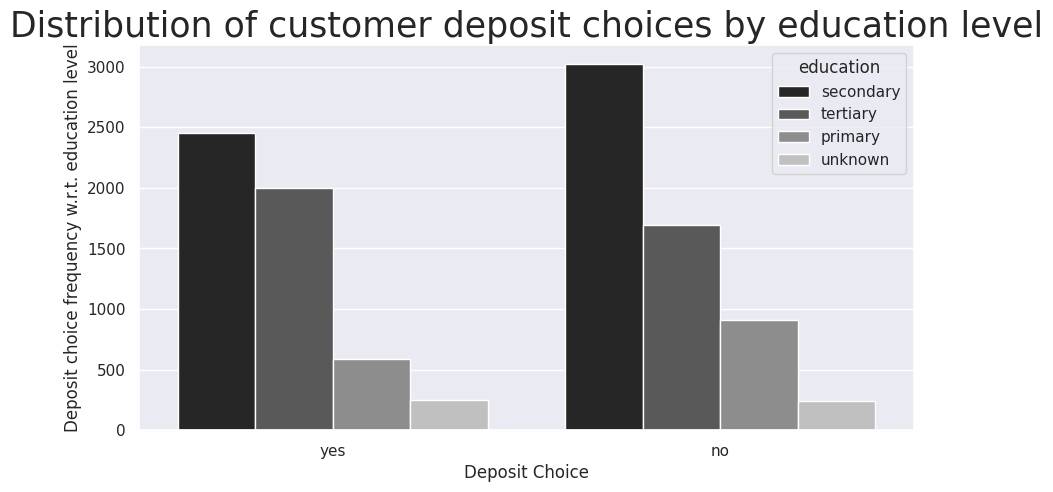

In [44]:
# Deposit choice vs. credit defaults
plt.figure(figsize = (10, 5))
sns.countplot(data = data, x = "deposit", hue = "education", palette = "dark:silver")

plt.title("Distribution of customer deposit choices by education level", fontsize = 25)

plt.xlabel("Deposit Choice")
plt.ylabel("Deposit choice frequency w.r.t. education level")

# plt.legend(["Working class age", "Retirement age"])

plt.show(); plt.close("all")

__Observation__: From the chart above, it is obvious that very few customers have defaulted on their credit. A likely implication of this is that the credit default status of customers will have little to no bearing on whether or not the customer would make a deposit. However, an equally likely, but diametrically opposed) implication is the fact that people who default on credit are likely not to have the funds to make long-term investment deposits anyway.

This is an interesting dichotomy, and might bear more looking into by __EliteBank__.

#### Customer job tendencies with respect to their educational level

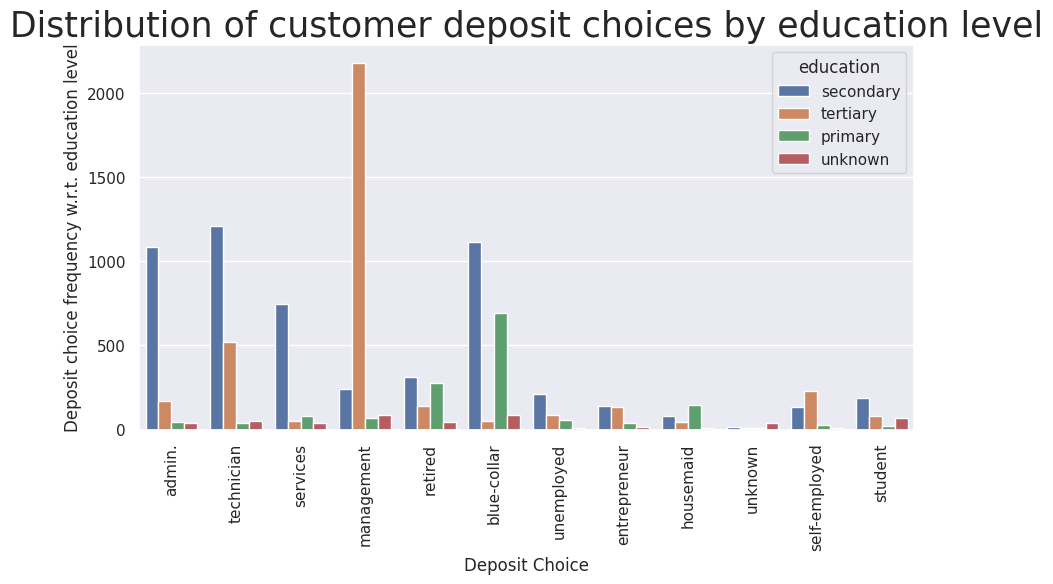

In [45]:
# Deposit choice vs. education levels
plt.figure(figsize = (10, 5))
sns.countplot(data = data, x = "job", hue = "education",)

plt.title("Distribution of customer deposit choices by education level", fontsize = 25)

plt.xlabel("Deposit Choice")
plt.ylabel("Deposit choice frequency w.r.t. education level")

plt.xticks(rotation = 90)

# plt.legend(["Working class age", "Retirement age"])

plt.show(); plt.close("all")

_Observation__: From the chart above, it is difficult to observe any overall trend. However, it would seem that people at the __secondary__ level of education dominate a good number of the occupations. This might make some sense as a lot of people are educated in the present day, and there seems to be a higher premium on education.

However, occupations like __admin__ are dominated by people with __secondary__ education, as these people usually require some degree of expertise (which will usually be learnt in school). People in the __management__ occupation seem to be more likely to have the __tertiary__ level of education. This makes some sense, given that a lot of managerial positions might require __MBA__ degrees.

### Occupation with respect to deposit decision
In addition to the above, the occupation of the customers may be viewed in comparison to their deposit decisions.

__Hypothesis__: Some professions are more likely to be higher paid. As such, people in these professions may likely have more money for the purpose of investing.

We can attempt to verify this by visually juxtaposing the __job__ and __deposit__ variables on a grouped bar chart.

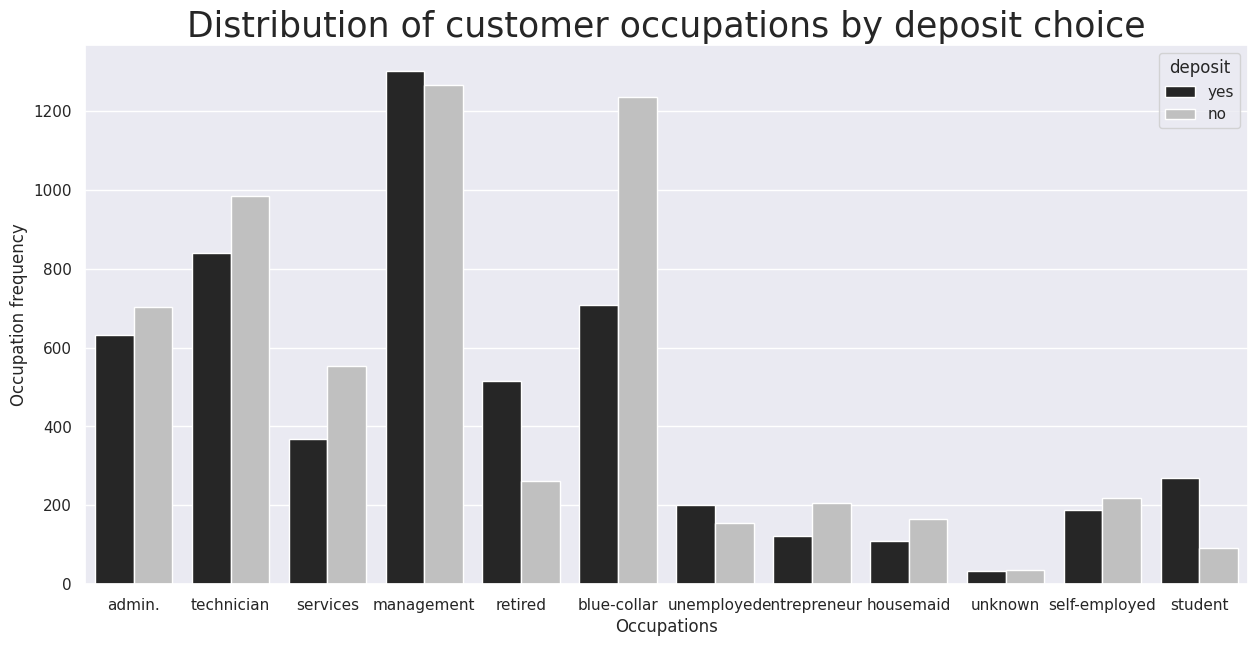

In [46]:
# Deposit choice vs. Occupation
plt.figure(figsize = (15, 7))
sns.countplot(data = data, x = "job", hue = "deposit", palette = "dark:silver")

plt.title("Distribution of customer occupations by deposit choice", fontsize = 25)

plt.xlabel("Occupations")
plt.ylabel("Occupation frequency")

# plt.legend(["Working class age", "Retirement age"])

plt.show(); plt.close("all")

Making inferences based on the most recent visualization, it would seem that:

+ __blue-collar__ workers are strongly less likely to make a deposit. Reasons for this are not clear; more data would be required to demystify this observation.

+ The same is observed for the __entrepreneur__ and __self-employed__ segments, although this makes more sense, as entrepreneurs are more likely to need their cash at hand for risk-taking and business expenses. To boost investments from these segments, the team at __EliteBank__ may find it worthwhile to come up with special incentives.

+ Another interesting trend to note is the __retired__ segment. It would seem that retired citizens are quite amenable to making investments. Taken with some real-world knowledge, this trend would make some sense. Younger people can always work to earn more money; older people may not necessarily have that luxury, and as such, have to make their money work for them, which means: __investments__. An appropriate action from __EliteBank__ would be to not only focus on this segment, but also come up with new and improved retirement funds for the elderly. This would incur more profits, with the added benefit of improving their public image.

+ With people in the __management__ segment, they seem to be going neck-to-neck. It is almost a 50-50 luck-of-the-draw. To push things in __EliteBank__'s favour, it might be prudent to do some more customer surveys, while also implementing preliminary incentives and business-oriented advertising to members of this segment. This might encourage them to thie their outfit's financial well-being more closely to __EliteBank__.

#### Customer decision in present campaign vs. their decision in previous campaign

Another avenue of enquiry is relationship between the outcomes of previous campaigns (__poutcome__), and the outcome of the present campaign (__deposit__) recorded in the data. This will allow us see which segment of our customers are likely to be repeat depositors.

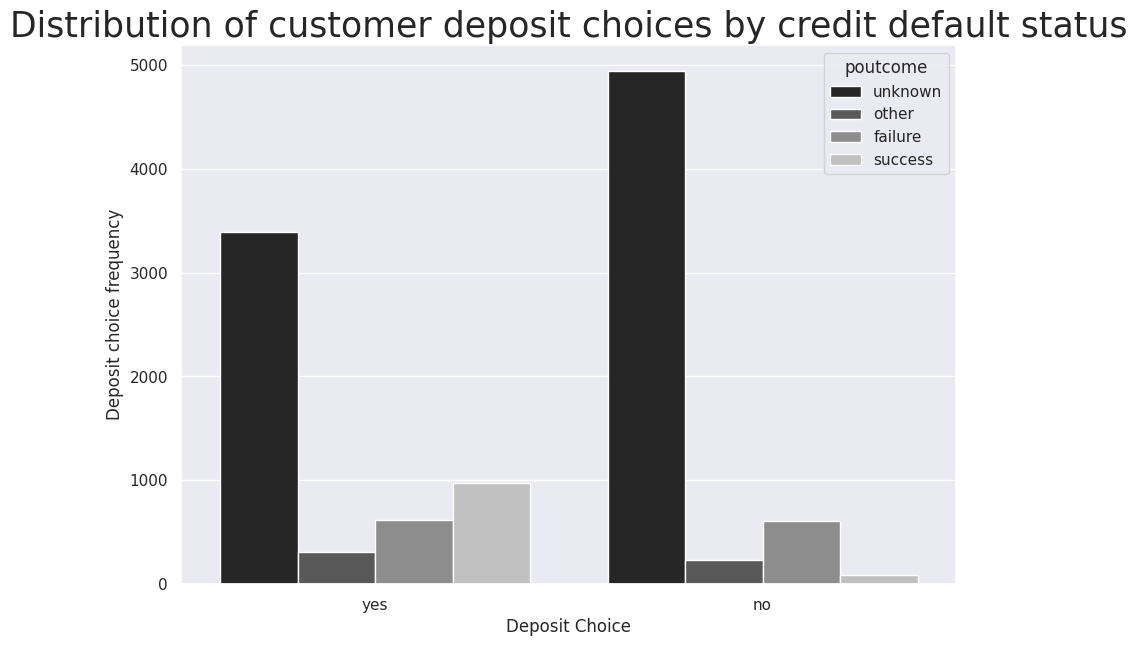

In [47]:
# Deposit choice vs. credit defaults
plt.figure(figsize = (10, 7))
sns.countplot(data = data, x = "deposit", hue = "poutcome", palette = "dark:silver")

plt.title("Distribution of customer deposit choices by credit default status", fontsize = 25)

plt.xlabel("Deposit Choice")
plt.ylabel("Deposit choice frequency")

# plt.legend(["Working class age", "Retirement age"])

plt.show(); plt.close("all")

__Observation__: The short visualization above would imply that people who made an investment in the previous telemarketing campaign (i.e., the __success__ segment) are more likely than not to make new investments. This is of course, contingent on the bank delivering well; that should be __EliteBank__'s goal, to deliver well, so as to secure more recurring investments.

#### Possible influence of marital Status on deposit choice

__Hypothesis__: Marital status might play some role in the choice of a customer to deposit. Someone who is single would more likely have less responsibility to shoulder, hence possibly freeing them up financially.

We can attempt to verify this by:
1. Observing the customer distribution based on __marital__ status.
2. Compare the __marital__ status to the __deposit__ decision.

In [48]:
### Marital distribution
data["marital"].value_counts()

,count
marital,
married,6351
single,3518
divorced,1293


In [49]:
### Marital distribution (proportion)
data["marital"].value_counts(normalize = True)

,proportion
marital,
married,0.568984
single,0.315176
divorced,0.115839


__Observation__: Based on the above, it is obvious that married people dominate the dataset. As such, the decision made by the married sample, would likely overshadow those by customers with other martital statuses.

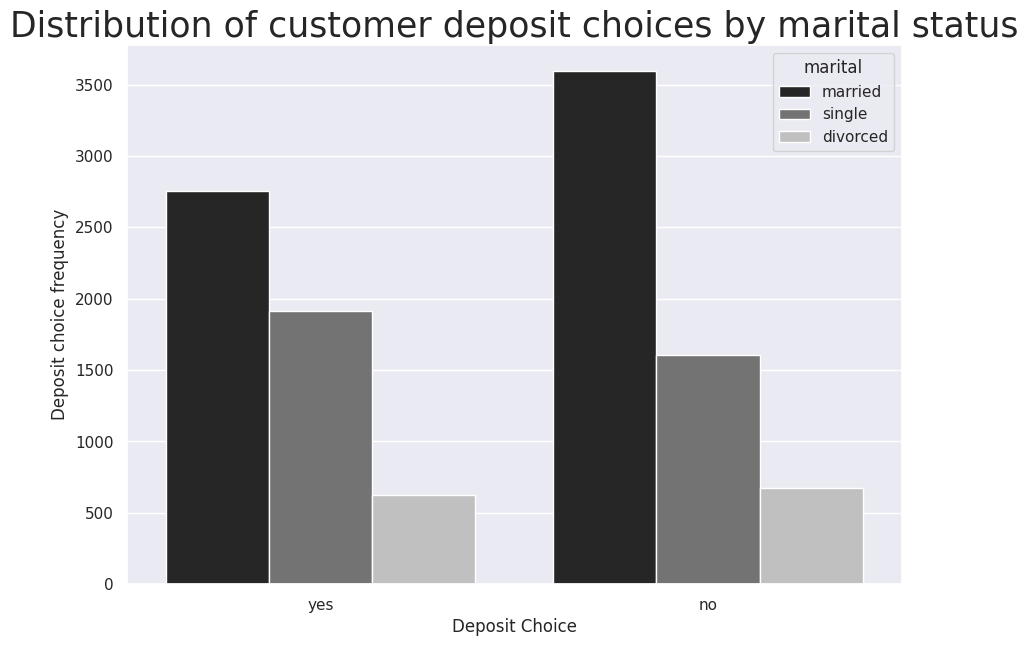

In [50]:
# Deposit choice vs. credit defaults
plt.figure(figsize = (10, 7))
sns.countplot(data = data, x = "deposit", hue = "marital", palette = "dark:silver")

plt.title("Distribution of customer deposit choices by marital status", fontsize = 25)

plt.xlabel("Deposit Choice")
plt.ylabel("Deposit choice frequency")

# plt.legend(["Working class age", "Retirement age"])

plt.show(); plt.close("all")

__Observation__:

The short visualization above could be taken in one of three ways. It could imply that:

+ There is no appreciable difference in deposit choice based on marital status. This is due to the fact that although the married people are more likely to make the deposit, than single people, who are in turn more likely to do so than divorced people, the same pattern holds true for the non-depositing segment of the sample. This might imply either that __(a.)__ marital status and the choice to make deposits have little correlation in this dataset or __(b.)__ married people are not well-represented in the data, making it dificult to get a good read on the situation. More data for analysis would be required here.

+ The __married__ and __single__ people are less likely to deposit, while the __divorced__ segment is about even. This inference would need to be exhaustively tested by __EliteBank__.

In [51]:
# Create marital status hash map
m = {
    "married": 0,
    "single": 1,
    "divorced": 2
}

In [52]:
# Obtain correlation between marital status and deposit choice
data.loc[:,["marital"]].map(lambda x: m[x]).corrwith(data["deposit"].apply(lambda x: 1 if x == "yes" else 0), method = "spearman")

,0
marital,0.080399


The correlation results lend some credence to our assumption that marital status and theb success of the campaign are not strongly linked.

#### Customer deposit decision with respect to interval of telemarketing calls

In order to ensure that the customers are not hounded with telemarketing calls, it would make some sense to have a good idea of the optimal interval to make those calls in. Doing this would involve:

1. Knowing the cases of __success__, and
2. understanding the distribution of time passing between the calls made.

In [53]:
# Extract successful segment for this campaign
success = data.loc[data["deposit"] == "yes"]

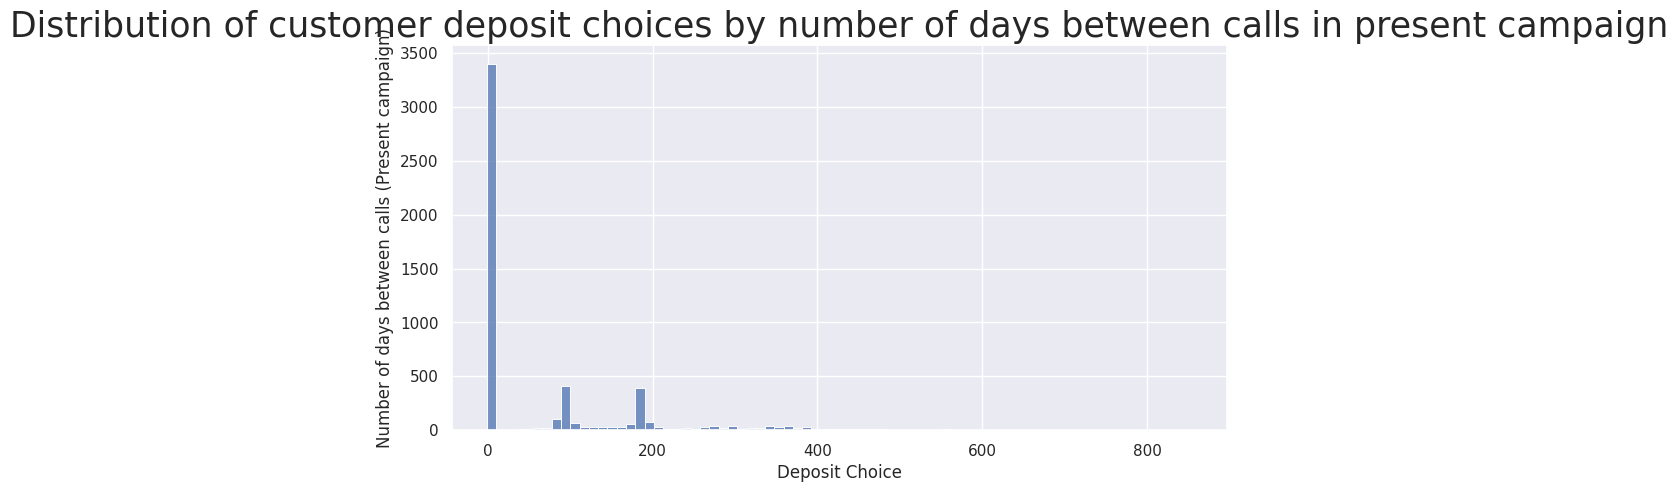

In [54]:
# Deposit choice vs. number of days between calls
plt.figure(figsize = (10, 5))
sns.histplot(data = success, x = "pdays")

plt.title("Distribution of customer deposit choices by number of days between calls in present campaign", fontsize = 25)

plt.xlabel("Deposit Choice")
plt.ylabel("Number of days between calls (Present campaign)")

# plt.legend(["Working class age", "Retirement age"])

plt.show(); plt.close("all")

The histogram generated above is quite telling in its implications. It would seem that an astounding majority of successes are recorded from people who are called as soon as possible between campaigns. From our data dictionary, we know that customers who did not participate in the previous campaign are represented with a __pdays__ value of _-1_. It might be that these people consitue a large portion of the tall peak of our histogram above.

An attempt to support/weaken this argument can be made; visualize the same variables, with the:
+ outcome of the previous campaign (__poutcome__),
+ the number of times the customer was actually contacted in the prevcious campaign (__previous__), and
+ the number of times the customer was contacted in this present campaign (__campaign__)

In addition, we can visualize the distribution of:

+ The number of calls made in the present campaign (__campaign__) which resulted in successful __deposits__ in the present telemarketing campaign.
+ The number of calls made in the previous campaign (__previous__) which resulted in successful __deposits__ in the previous telemarketing campaign.

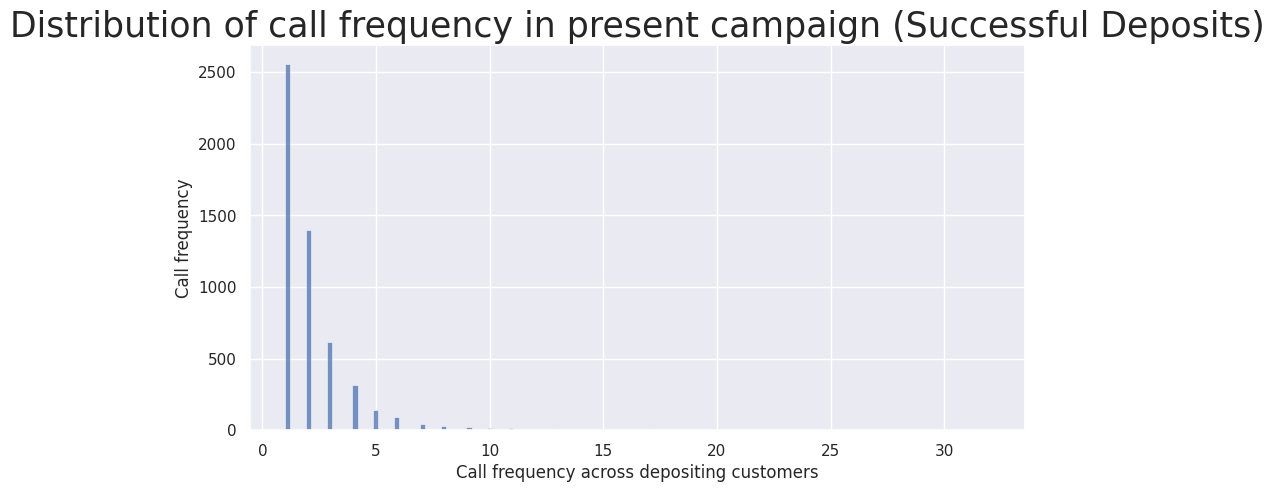

In [55]:
# Distribution of number of calls in this campaign that ended in successful deposits
plt.figure(figsize = (10, 5))
sns.histplot(data = success, x = "campaign")

plt.title("Distribution of call frequency in present campaign (Successful Deposits)", fontsize = 25)

plt.xlabel("Call frequency across depositing customers")
plt.ylabel("Call frequency")

# plt.legend(["Working class age", "Retirement age"])

plt.show(); plt.close("all")

In [56]:
# Extract successful segment for previous campaign
previous_success = data.loc[data["poutcome"] == "success"]

In [57]:
previous_success

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
899,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes
951,53,retired,married,tertiary,no,2269,no,no,cellular,17,nov,1091,2,150,1,success,yes
985,46,unemployed,divorced,secondary,no,3354,yes,no,cellular,19,nov,522,1,174,1,success,yes
994,40,management,married,tertiary,no,3352,yes,no,cellular,19,nov,639,2,27,1,success,yes
1151,31,management,married,tertiary,no,1331,no,no,cellular,3,feb,182,2,90,1,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10798,67,technician,married,secondary,no,0,no,no,cellular,13,aug,1152,2,188,1,success,no
10911,33,technician,married,secondary,no,348,yes,no,cellular,7,may,263,2,294,1,success,no
10918,36,entrepreneur,single,tertiary,no,145,yes,no,cellular,18,may,450,2,304,2,success,no
11069,33,self-employed,single,tertiary,no,658,yes,no,cellular,12,apr,93,1,173,2,success,no


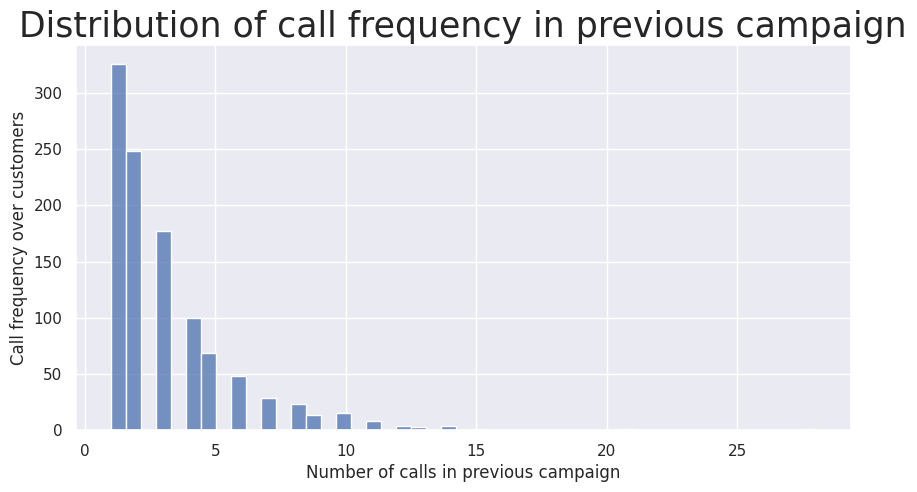

In [58]:
# Distribution of call frequency in previous campaign
plt.figure(figsize = (10, 5))
sns.histplot(data = previous_success, x = "previous",)

plt.title("Distribution of call frequency in previous campaign", fontsize = 25)

plt.xlabel("Number of calls in previous campaign")
plt.ylabel("Call frequency over customers")

# plt.legend(["Working class age", "Retirement age"])

plt.show(); plt.close("all")

__Observation__: Taking the last two charts in tandem, it would seem that more calls had to be made in the previous campaign in order to secure deposits, as compared to the present campaign.

#### Inter-campaign call interval vs. previous deposit decision

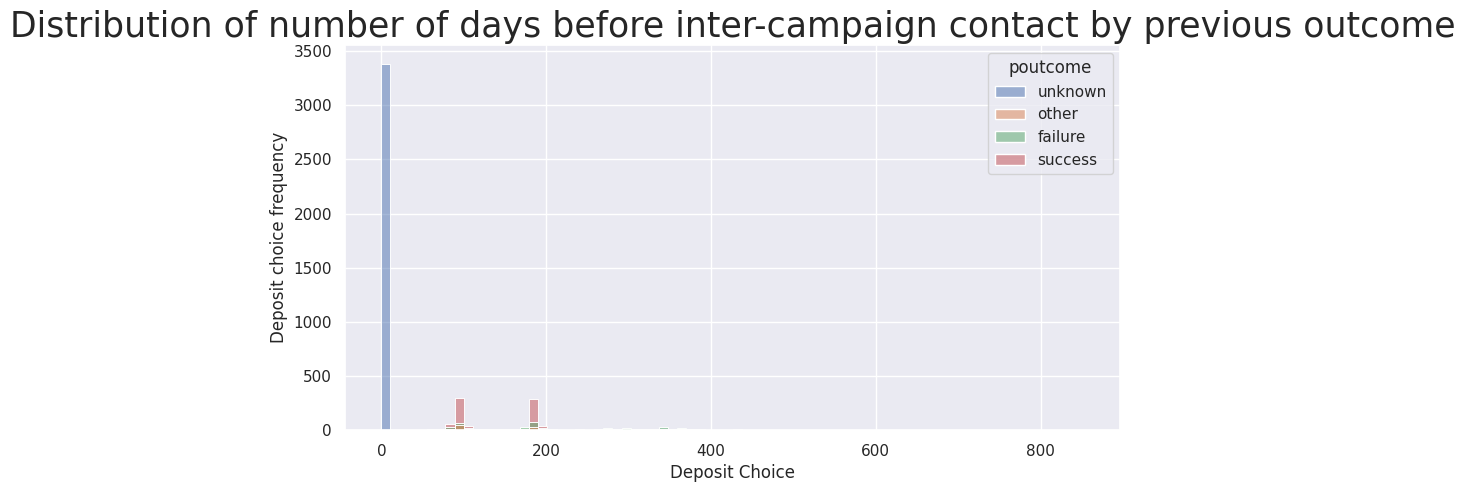

In [59]:
# Time between inter campaign calls (in days) vs. previous outcome
plt.figure(figsize = (10, 5))
sns.histplot(data = success, x = "pdays", hue = "poutcome")

plt.title("Distribution of number of days before inter-campaign contact by previous outcome", fontsize = 25)

plt.xlabel("Deposit Choice")
plt.ylabel("Deposit choice frequency")

# plt.legend(["Working class age", "Retirement age"])

plt.show(); plt.close("all")

Taking these charts in conjunction, it would seem that the most advertising success was made from people who either:
+ had an outcome of __unknown__ from the previous campaign (e.g., were indecisive and decided to think on it and later commit)
+ were fresh customers, with no previous exposure to campaigns with the bank.

This may imply two things:
1. that followup is important with a lot of participants from previous ad campaigns.
2. securing a new customer base and expanding their present one is an important action point.

#### Customer deposit decision and call duration

What is the optimal length of a call? How long, ideally, should the banker keep up the communication attempt?

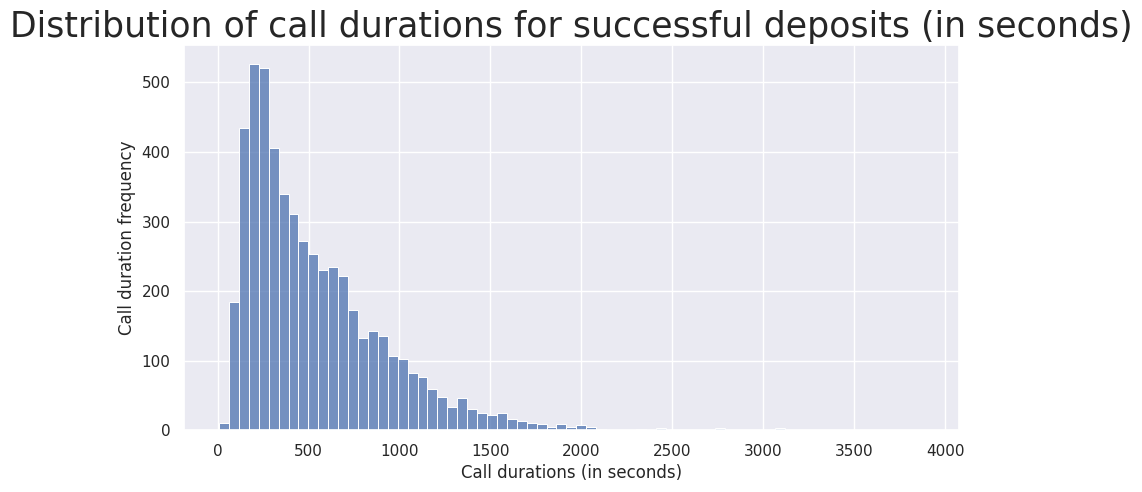

In [60]:
# Distribution of call durations for successful deposits
plt.figure(figsize = (10, 5))
sns.histplot(data = success, x = "duration",)

plt.title("Distribution of call durations for successful deposits (in seconds)", fontsize = 25)

plt.xlabel("Call durations (in seconds)")
plt.ylabel("Call duration frequency")

plt.show(); plt.close("all")

From the chart above, it appears that the most success is observed as soon as possible, but not too soon, at around the _250 second_ (or _~4 minute_) mark. This should give enough time to build rapport with the client, and disemminate necessary information, while not dragging on too long.

#### Label imbalance
Next, an observation of the label distribution can be made. This would allow detection of data imbalance, if there is any.

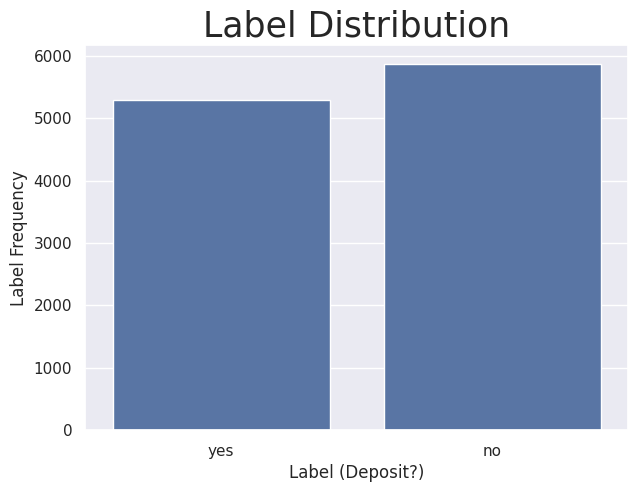

In [61]:
# Distribution of labels
plt.figure(figsize = (7, 5))
sns.countplot(data = data, x = "deposit",)

plt.title("Label Distribution", fontsize = 25)

plt.xlabel("Label (Deposit?)")
plt.ylabel("Label Frequency")

plt.show(); plt.close("all")

It would appear that the label imbalance is slight, and hence negligible. This would imply that the accuracy metric should be trustworthy for evaluating any models built on the dataset.

##### Duplicate records

We check for duplicated rows in the data.

In [62]:
# Get the duplicated records
num_duplicated = len(data.loc[data.duplicated()])

In [63]:
print(f"Number of duplicated records: {num_duplicated}.")

Number of duplicated records: 0.


There are no duplicated records in the dataset. This is very good.

##### Feature correlation

It would make some sense to observe the features for colinearity. As most of the features in the dataset are numerical, the __Pearson correlation coefficient__ will be utilized.

In [64]:
correlation = data.select_dtypes(exclude=["object"]).corr(method = "pearson")

In [65]:
correlation

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


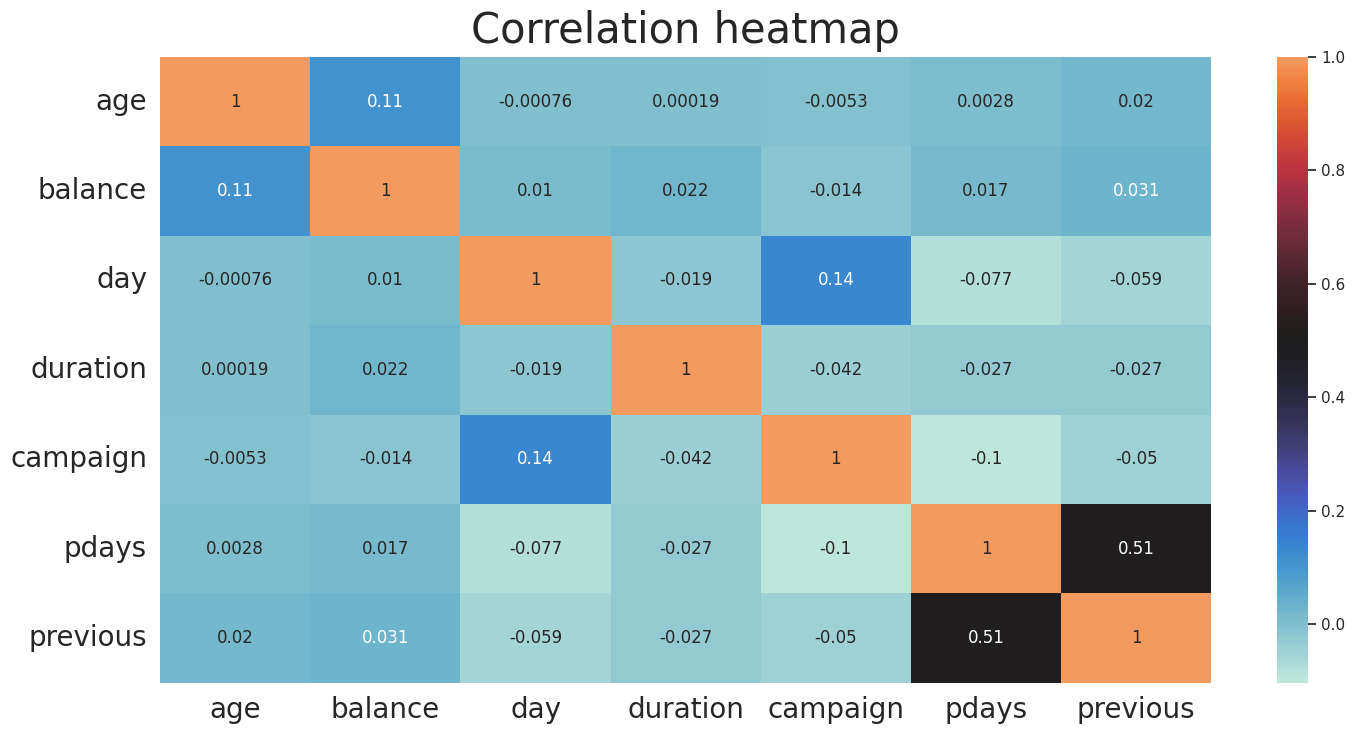

50057

In [66]:
# Correlation heat map

plt.figure(figsize = (15, 15/2))

sns.heatmap(correlation, center=.5, annot = True)

plt.title("Correlation heatmap", fontsize = 30, pad = 10)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20, rotation = 90*4)

plt.tight_layout()
plt.show(); plt.close("all")
gc.collect()

In [67]:
# Correlation of target variabe with independent variables
target = data["deposit"].apply(lambda x: 1 if x == "yes" else 0)
data.select_dtypes(exclude=["object"]).corrwith(target, method = "spearman")

,0
age,-0.012156
balance,0.157584
day,-0.058325
duration,0.527801
campaign,-0.126666
pdays,0.212805
previous,0.229905


From the visual heatmap above, there is very little multicollinearity in the dataset. Beyond that, it is obvious that most of the features exhibit low correlations with one another and with the target variables themselves. This may be taken as a mix of good and bad news.

The good news is that there is little colinearity among the features. This is good for feature independence, which might imply that each variable encodes information that might be relatively orthogonal to the information encoded within other variables. The bad news is, that any model trained in these features might have a difficult time learning anything from the data, as the target variable has little correlation with the independent variables.

More specifically, the target exhibits the best level of correlation with the:

+ __balance__,
+ __duration__,
+ __pdays__ and
+ __previous__.

In [68]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


#### 2.2. Data Implications

Implied by our findings above, we can say the following:

1. ___Missing values___: There are no missing values in the dataset.

2. ___Data duplication___: There are no duplicated values in the dataset.

3. ___Correlation___: For the most part, although there are some instances of multicollinearity, the features exhibit very little correlation with one another, hence ensuring feature independence. However, the target variable exhibits a low correlation with the independent variables.

4. ___Categorical features___: There are a few categorical features in the dataset (___job___, ___marital___, ___education___, ___default___, ___housing___, ___loan___, ___contact___, ___poutcome___, and ___deposit___). These will need to be encoded in some way.

<div><h3>03. Data Preparation</h3></div>

Based on the *__Data Implications__* discovered prior, the following steps will be experimented upon for the data preparation stage.

1. __Split Data__: Split the data into train and test sets.
2. __Feature Encoding__: Encode categorical features.
3. __Feature Scaling__: Some features display large magnitudes/ranges (e.g., __balance__ and __duration__). These will need to be scaled.

<div align="center"><h3>3.1. Enter Data Preparation Code Here</h3></div>

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
# Select the column types
scale_columns = [
    "age",
    "balance",
    "day",
    "duration"
]

categorical_columns = data.select_dtypes(include = ["object"]).columns.tolist()
categorical_columns.remove("deposit")

In [71]:
# Extract features and labels from dataset
X, y = data.drop(labels = ["deposit"], axis = 1), data["deposit"]

In [72]:
# Encode labels
map_dictionary = {
    "yes": 1,
    "no": 0
}

y = y.apply(lambda x: map_dictionary[x])

In [73]:
# Separate into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, stratify = y)

<div><h3>04. Data Modelling</h3></div>

Three modelling options will be explored:

1. Logistic Regression
2. ExtraTrees
3. CatBoost models

#### 4.1. Modelling

In [75]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.3 MB/s eta 0:00:00


In [76]:
# Utilities for data preparation
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Utilities for data scaling
from sklearn.pipeline import Pipeline

# Utilities for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

from catboost import CatBoostClassifier

In [79]:
# Utilities for data preparation
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier

def get_transformer(categorical_columns, scale_columns, one_hot=True):
    transformers = []
    if categorical_columns:
        if one_hot:
            transformers.append(("onehot", OneHotEncoder(handle_unknown = "ignore"), categorical_columns))
        else:
            transformers.append(("ordinal", OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = -1), categorical_columns))
    if scale_columns:
        transformers.append(("scaler", StandardScaler(), scale_columns))

    return ColumnTransformer(transformers=transformers)

# Instantiate models
log_pipe = Pipeline(
    steps = [
        ("1", get_transformer(categorical_columns, scale_columns, one_hot=True)),
        ("2", LogisticRegression(max_iter = 1000))
    ]
)

cat_pipe = Pipeline(
    steps = [
        ("1", get_transformer(categorical_columns, scale_columns, one_hot=False)),
        ("2", CatBoostClassifier(verbose = 0))
    ]
)

extra_pipe = Pipeline(
    steps = [
        ("1", get_transformer(categorical_columns, scale_columns, one_hot=False)),
        ("2", ExtraTreesClassifier())
    ]
)

In [80]:
# Fit ExtraTrees model
extra_pipe.fit(X_train, y_train)

Pipeline(steps=[('1',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration'])])),
                ('2', ExtraTreesClassifier())])

In [81]:
# Fit Linear model
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('1',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration'])])),
                ('2', LogisticRegression(max_iter=1000))])

In [82]:
# Fit CatBoost model
cat_pipe.fit(X_train, y_train)

Pipeline(steps=[('1',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration'])])),
                ('2',
                 <catboost.core.CatBoostClassifier object at 0x7b9669bae9d0>)])

In [83]:
# Fit CatBoost model
cat_pipe.fit(X_train, y_train)

Pipeline(steps=[('1',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration'])])),
                ('2',
                 <catboost.core.CatBoostClassifier object at 0x7b9669bae9d0>)])

<div align="center"><h3>4.1. Enter Data Modelling Code Here</h3></div>

<div><h3>05. Model Evaluation</h3></div>

In [84]:
from sklearn.metrics import classification_report

In [85]:
def test_model(model, data):
    # Extract train and test sets from passed data variable
    train, test = data

    # Extract features and targets for train and test sets respectively
    X_train, y_train = train
    X_test, y_test = test

    # Obtain train and test classification resuilts
    train_results = classification_report(y_train, model.predict(X_train))
    test_results = classification_report(y_test, model.predict(X_test))

    print("="*30, "Train Report", "="*30, "\n")
    print(train_results)

    print("="*30, "Test Report", "="*30, "\n")
    print(test_results)

    return

In [86]:
# Assemble data for testing
data_ = [[X_train, y_train], [X_test, y_test]]

### Evaluation for Logistic Regression model

In [87]:
# Linear model
test_model(log_pipe, data_)

============================== Train Report ============================== 

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      4111
           1       0.83      0.80      0.81      3702

    accuracy                           0.83      7813
   macro avg       0.83      0.82      0.82      7813
weighted avg       0.83      0.83      0.82      7813

============================== Test Report ============================== 

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1762
           1       0.84      0.77      0.81      1587

    accuracy                           0.82      3349
   macro avg       0.83      0.82      0.82      3349
weighted avg       0.83      0.82      0.82      3349



### Evaluation for ExtraTrees model

In [88]:
# ExtraTrees model
test_model(extra_pipe, data_)

============================== Train Report ============================== 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4111
           1       1.00      1.00      1.00      3702

    accuracy                           1.00      7813
   macro avg       1.00      1.00      1.00      7813
weighted avg       1.00      1.00      1.00      7813

============================== Test Report ============================== 

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1762
           1       0.82      0.83      0.82      1587

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



### Evaluation for CatBoost model

In [89]:
# CatBoost model
test_model(cat_pipe, data_)

============================== Train Report ============================== 

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      4111
           1       0.89      0.93      0.91      3702

    accuracy                           0.91      7813
   macro avg       0.91      0.91      0.91      7813
weighted avg       0.91      0.91      0.91      7813

============================== Test Report ============================== 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1762
           1       0.84      0.88      0.86      1587

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



Based on our final observations, the AdaBoost model seems to do the best in terms of magnitudes. However, in terms of generalization, the logistic regression and CatBoost models have it beat with ~1.0% and ~5.0% errors respectively.

Purely based off of generalization errors, the logistic regression model beats the others out completely. For this reason, a decision can be made to go for it.

The logistic regression model can be difficult to tune, as it has very few hyperparameters. The CatBoost model, on the other hand has a good number of hyperparameters that can be tuned to not only improve performance, but also reduce generalization error. As such, the CatBoost model is also a good fit.

### Hyperparametric Optimization

To better improve the generalization errors, we can attempt to optimize the parameters of the logistic regression and CatBoost models.

In [90]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [91]:
# New LogisticRegression and CatBoost pipelines
new_cat_pipe = Pipeline(
    steps = [
        ("1", get_transformer(categorical_columns, scale_columns, one_hot=False)),
        ("2", CatBoostClassifier())
    ]
)

new_log_pipe = Pipeline(
    steps = [
        ("1", get_transformer(categorical_columns, scale_columns, one_hot=True)),
        ("2", LogisticRegression(max_iter = 1000))
    ]
)

In [92]:
# Hyperparametric grid
cat_param_grid = {
    # "2__bootstrap_type": ["Bayesian", "Bernoulli"],
    "2__l2_leaf_reg": [0., .1, .2, .3, .4, .5],
    "2__sampling_frequency": ["PerTree", "PerTreeLevel"]
}
log_param_grid = {
    # "2__bootstrap_type": ["Bayesian", "Bernoulli"],
    "2__penalty": ['l1', 'l2', 'elasticnet', None],
    "2__C": [1.0, 2., 3., 4.,],
    "2__solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky',]
}

In [93]:
# Instantiate grid object
cat_grid = GridSearchCV(
    estimator = new_cat_pipe, param_grid = cat_param_grid,
    scoring = "accuracy", cv = RepeatedStratifiedKFold(n_splits = 2, n_repeats=3)
)
log_grid = GridSearchCV(
    estimator = new_log_pipe, param_grid = log_param_grid,
    scoring = "accuracy", cv = RepeatedStratifiedKFold(n_splits = 2, n_repeats=3)
)

In [94]:
# Fit grid on data
cat_grid.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6766022	total: 3.04ms	remaining: 3.04s
1:	learn: 0.6609081	total: 6.15ms	remaining: 3.07s
2:	learn: 0.6470489	total: 9.09ms	remaining: 3.02s
3:	learn: 0.6326374	total: 12.2ms	remaining: 3.03s
4:	learn: 0.6213477	total: 15.3ms	remaining: 3.05s
5:	learn: 0.6086899	total: 18.2ms	remaining: 3.02s
6:	learn: 0.5961379	total: 21.4ms	remaining: 3.04s
7:	learn: 0.5877279	total: 24.5ms	remaining: 3.03s
8:	learn: 0.5777438	total: 27.7ms	remaining: 3.05s
9:	learn: 0.5690998	total: 33.3ms	remaining: 3.3s
10:	learn: 0.5619689	total: 38.1ms	remaining: 3.42s
11:	learn: 0.5567621	total: 41.5ms	remaining: 3.42s
12:	learn: 0.5498176	total: 45ms	remaining: 3.41s
13:	learn: 0.5408007	total: 48.8ms	remaining: 3.44s
14:	learn: 0.5345152	total: 52.1ms	remaining: 3.42s
15:	learn: 0.5280655	total: 55.4ms	remaining: 3.41s
16:	learn: 0.5226410	total: 58.8ms	remaining: 3.4s
17:	learn: 0.5165943	total: 62.1ms	remaining: 3.39s
18:	learn: 0.5109357	total:

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=2, random_state=None),
             estimator=Pipeline(steps=[('1',
                                        ColumnTransformer(transformers=[('ordinal',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration'])])),
                                       ('2',
                                        <catboost.core.CatBoostClassifier object at 0x7b9669b6c610>)]),
             param_grid={'2__l2_leaf_reg': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                         '2__sampling_frequency': ['PerTree', 'PerTreeLevel']},
             scoring='accuracy')

In [95]:
# Fit grid on data
log_grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.30924e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing th

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=2, random_state=None),
             estimator=Pipeline(steps=[('1',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration'])])),
                                       ('2',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'2__C': [1.0, 2.0, 3.0, 4.0],
                         '2__penalty': ['l1', 'l2', 'elasticnet', None],
                         '2__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                       'newton-cholesky']},
             scoring='accuracy')

In [96]:
# Best estimator from logistic grid
test_model(log_grid.best_estimator_, data_)

============================== Train Report ============================== 

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      4111
           1       0.83      0.79      0.81      3702

    accuracy                           0.82      7813
   macro avg       0.83      0.82      0.82      7813
weighted avg       0.82      0.82      0.82      7813

============================== Test Report ============================== 

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1762
           1       0.84      0.77      0.81      1587

    accuracy                           0.82      3349
   macro avg       0.83      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [97]:
# Bets estmator from CatBoost grid
test_model(cat_grid.best_estimator_, data_)

============================== Train Report ============================== 

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      4111
           1       0.92      0.94      0.93      3702

    accuracy                           0.93      7813
   macro avg       0.93      0.93      0.93      7813
weighted avg       0.93      0.93      0.93      7813

============================== Test Report ============================== 

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1762
           1       0.84      0.87      0.85      1587

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



Based on our final observations from the optimization process, we have not been able to improve the models. This may be due to:

1. Insufficient data
2. Focusing on a small/wrong range of hyperparameters.
3. Focusing on the wrong hyperparameters.

Further optimization of the models might result in better models. This can be explored further. At this point, either model performs quite adequately. The final choice would be the Logistic Model, due to:

1. Lower generalization error,
2. Faster training, and
3. More explanability

<div align="center"><h3>5.1. Enter Model Evaluation Code Here</h3></div>

<div><h3>06. Model Deployment</h3></div>

With the model performance up to speed, the final artefact needs to be deployed for use. There are a number of options. They include:


1. Local Deployment
   * Flask
   * Django
2. Cloud Deployment
   * AWS
   * GCP
   * Streamlit + GitHub

<div align="center"><h3>6.1. Model Deployment Code</h3></div>